In [23]:
import pandas as pd
import sweetviz
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as ex

# Ignorar todos los FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

**Lectura e informacion de los datos**
---

In [11]:
data=pd.read_csv('../../Data/bank-full.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,car,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,1,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,0,unknown,5,may,198,1,-1,0,unknown,no


Vemos las columnas de las que disponemos, el tipo de dato que tienen asociado y el numero de valores no-nulos.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         49732 non-null  int64 
 1   job         49732 non-null  object
 2   marital     49732 non-null  object
 3   education   49732 non-null  object
 4   default     49732 non-null  object
 5   balance     49732 non-null  int64 
 6   housing     49732 non-null  object
 7   loan        49732 non-null  object
 8   car         49643 non-null  object
 9   contact     49732 non-null  object
 10  day         49732 non-null  int64 
 11  month       49732 non-null  object
 12  duration    49732 non-null  int64 
 13  campaign    49732 non-null  int64 
 14  pdays       49732 non-null  int64 
 15  previous    49732 non-null  int64 
 16  poutcome    49732 non-null  object
 17  subscribed  49732 non-null  object
dtypes: int64(7), object(11)
memory usage: 6.8+ MB


# Análisis estadístico de los datos


In [16]:
print(data.nunique())

age             77
job             12
marital          3
education        4
default          2
balance       7168
housing          2
loan             2
car              3
contact          3
day             31
month           12
duration      1573
campaign        48
pdays          559
previous        41
poutcome         4
subscribed       2
dtype: int64


La variable balance se corresponde con el saldo promedio anual, deberiamos agruparlo en intervalos, para evitar el efecto de los outliers y procedemos de la misma manera con la variable duration y pdays.

## a) Descriptive stactistics

Disponemos de 49.732 observaciones con 18 Atributos (Variables).

In [17]:
data.shape

(49732, 18)

## Descripción de la variable objetivo

Estudiemos la estructura y características de la variable objetivo 'subscribed'. Esta puede tomar dos valores 'yes' o 'no'.

Clasificacion de observacion en la variable objetivo ( subscribed)
--------------------------------------------------
subscribed
no     43922
yes     5810
Name: count, dtype: int64

 Gráfico
--------------------------------------------------


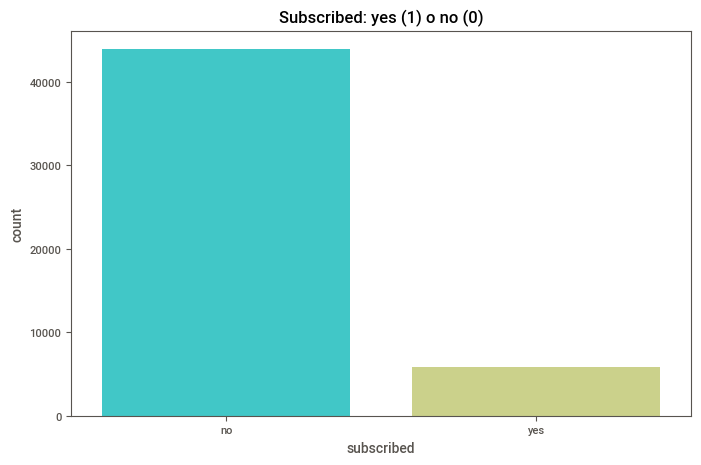

In [20]:
print('Clasificacion de observacion en la variable objetivo ( subscribed)')
print('-'*50)
print(data['subscribed'].value_counts())
print('\n Gráfico')
print('-'*50)
plt.figure(figsize=(8,5))
sns.countplot(x='subscribed',data=data, palette='rainbow')
plt.title("Subscribed: yes (1) o no (0)")
plt.show()

Falta unir grafico anterior con quesito

In [25]:
fig = ex.pie(data,names='subscribed')
fig.update_layout(title='Proporción de observaciones de cada clase (0, 1)')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

La muestra está un poco desbalanceada. Deberemos emplear técncias de oversampling para poder realizar redicciones precisas.

In [26]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


En esta descripción sólo aparecen aquellas variables que son numéricas.
Para tratar las categóricas tenemos que hacerlo de forma distinta.


In [27]:
cat=[] #variables categóricas
num=[] #variables numéricas
for i in data.columns:
  if data[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'car', 'contact', 'month', 'poutcome', 'subscribed']
num =  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


## Descripción de las variables numéricas (boxplot)

Hacemos un boxplot para analizar gráficamente los valores de las variables numéricas.

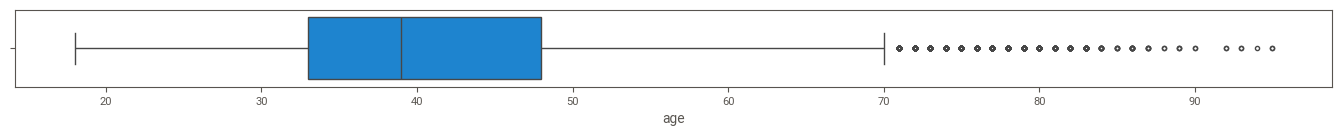

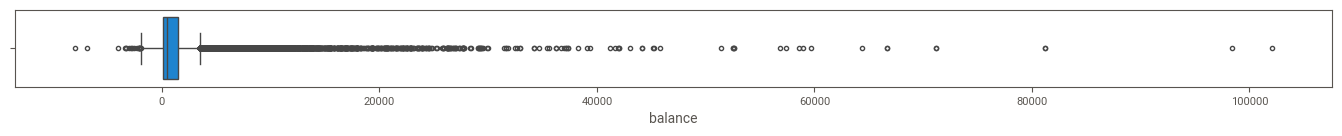

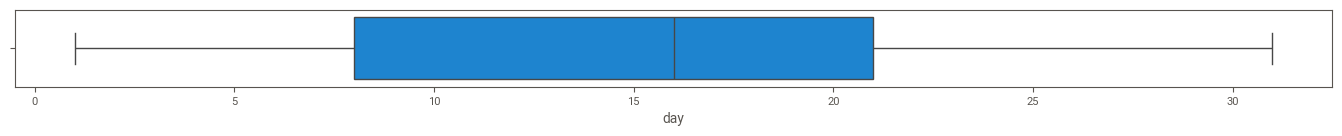

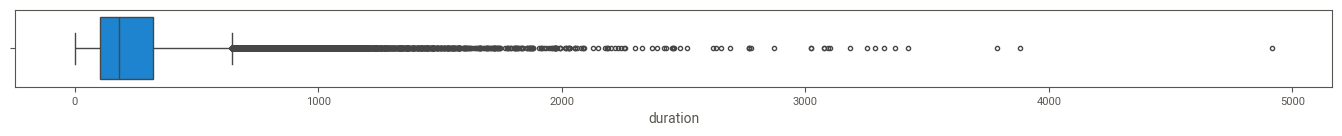

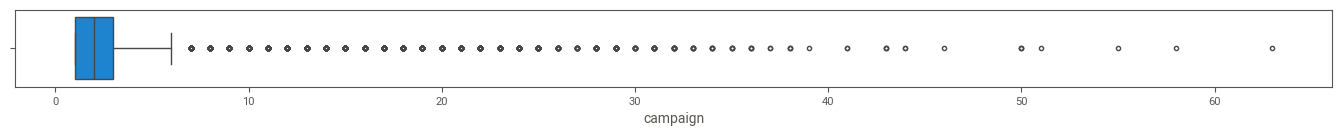

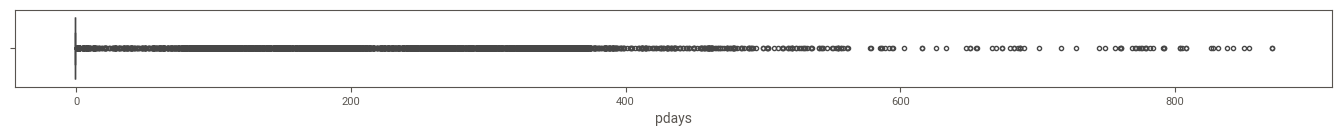

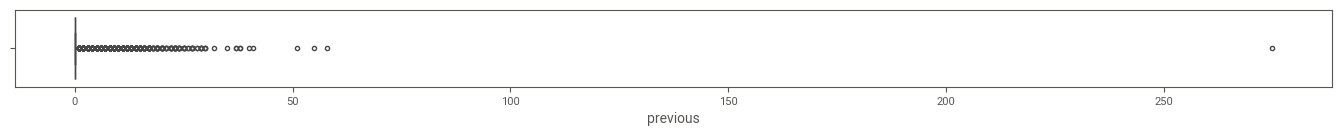

In [27]:
for column in data[num]:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=data[num], x=column)

Fonsi comenta estos graficos

Ahora hacemos un análisis descritivo de las variables categóricas de la misma forma que lo hemos hecho para la variable objetivo.

## Descripción de las variables categóricas


Descripcion de la variable  job
--------------------------------------------------
Categorías:
job
blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: count, dtype: int64
Número de categorias:  12


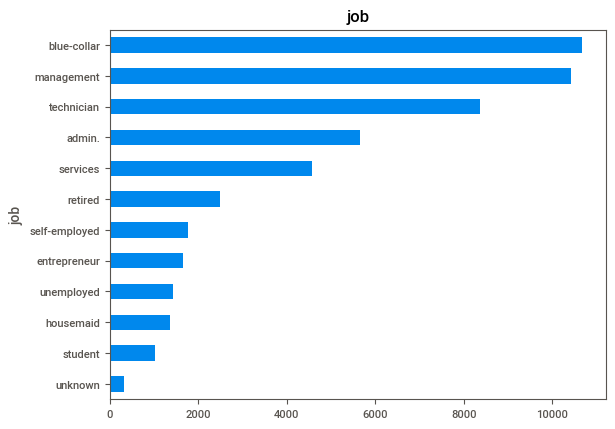


Descripcion de la variable  marital
--------------------------------------------------
Categorías:
marital
married     30011
single      13986
divorced     5735
Name: count, dtype: int64
Número de categorias:  3


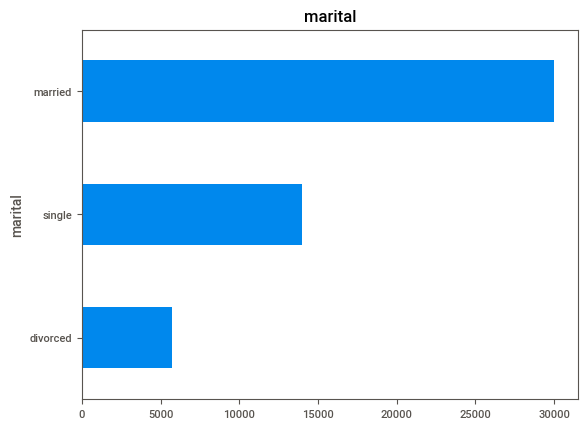


Descripcion de la variable  education
--------------------------------------------------
Categorías:
education
secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: count, dtype: int64
Número de categorias:  4


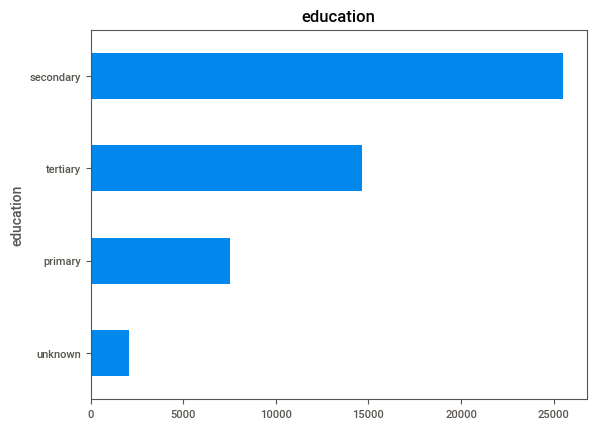


Descripcion de la variable  default
--------------------------------------------------
Categorías:
default
no     48841
yes      891
Name: count, dtype: int64
Número de categorias:  2


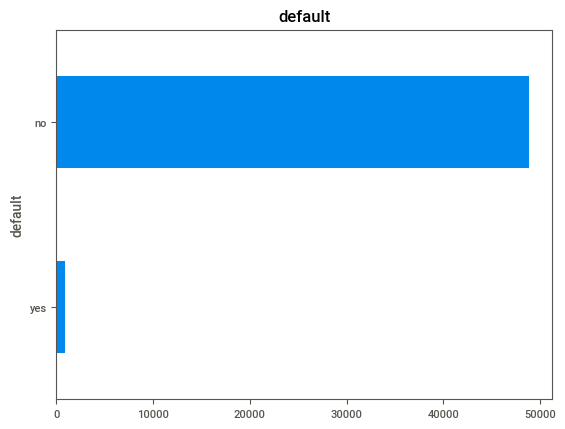


Descripcion de la variable  housing
--------------------------------------------------
Categorías:
housing
yes    27689
no     22043
Name: count, dtype: int64
Número de categorias:  2


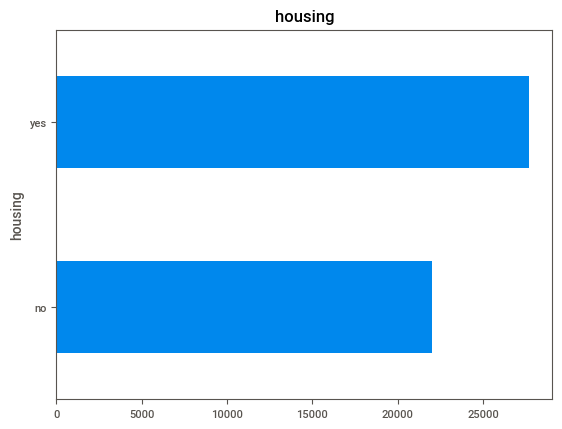


Descripcion de la variable  loan
--------------------------------------------------
Categorías:
loan
no     41797
yes     7935
Name: count, dtype: int64
Número de categorias:  2


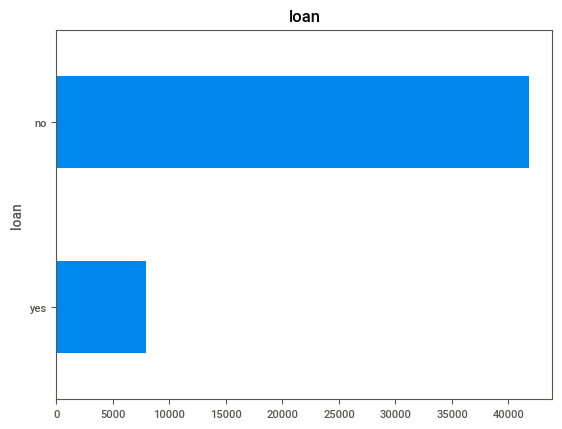


Descripcion de la variable  car
--------------------------------------------------
Categorías:
car
1          29982
0          13946
unknown     5715
Name: count, dtype: int64
Número de categorias:  3


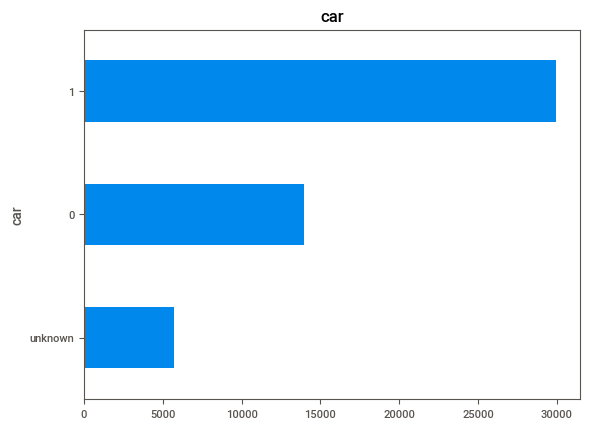


Descripcion de la variable  contact
--------------------------------------------------
Categorías:
contact
cellular     32181
unknown      14344
telephone     3207
Name: count, dtype: int64
Número de categorias:  3


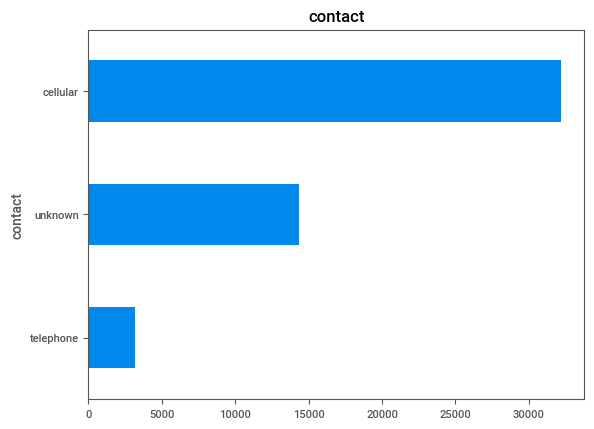


Descripcion de la variable  month
--------------------------------------------------
Categorías:
month
may    15164
jul     7601
aug     6880
jun     5872
nov     4359
apr     3225
feb     2871
jan     1551
oct      818
sep      631
mar      526
dec      234
Name: count, dtype: int64
Número de categorias:  12


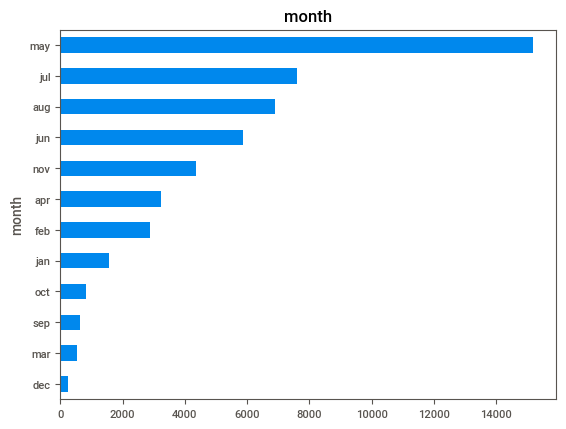


Descripcion de la variable  poutcome
--------------------------------------------------
Categorías:
poutcome
unknown    40664
failure     5391
other       2037
success     1640
Name: count, dtype: int64
Número de categorias:  4


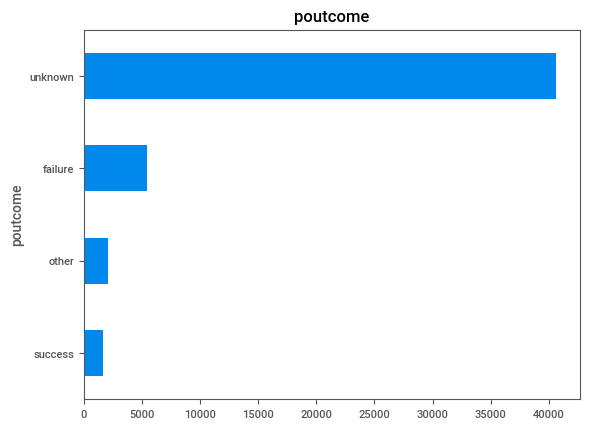


Descripcion de la variable  subscribed
--------------------------------------------------
Categorías:
subscribed
no     43922
yes     5810
Name: count, dtype: int64
Número de categorias:  2


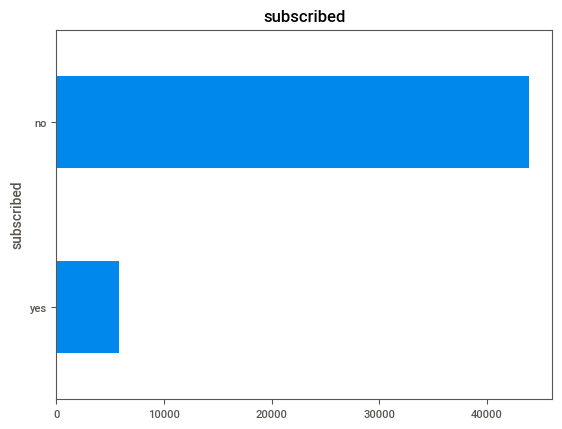

In [30]:
for i in data.columns: # bucle para todas las columnas del dataframe
    if data[i].dtypes == 'object': #condición que debe cumplirse (que sean del tipo 'object')
        print('\nDescripcion de la variable ',i)
        print('-'*50)
        print('Categorías:')
        print(data[i].value_counts())
        print('Número de categorias: ',data[i].nunique())
        data[i].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
        plt.title(i)
        plt.show()


Separamos las variables predictoras de la variable objetivo.

In [29]:
X = data[list(data.columns[1:data.shape[1]])] #todas las variables menos la variable respuesta
y = data['subscribed']

## Mátriz de correlacion de las variables numéricas

<Axes: >

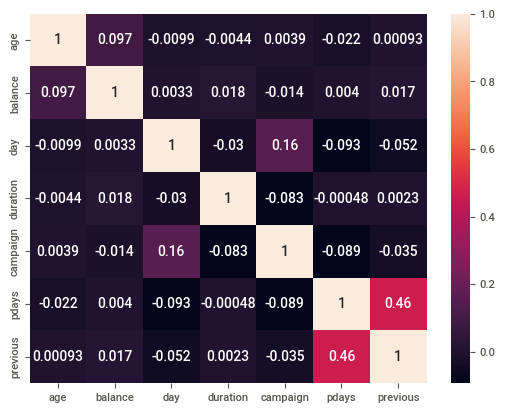

In [32]:
sns.heatmap(data[num].corr(),annot=True)

## Distribución de las variables numéricas (histogramas)

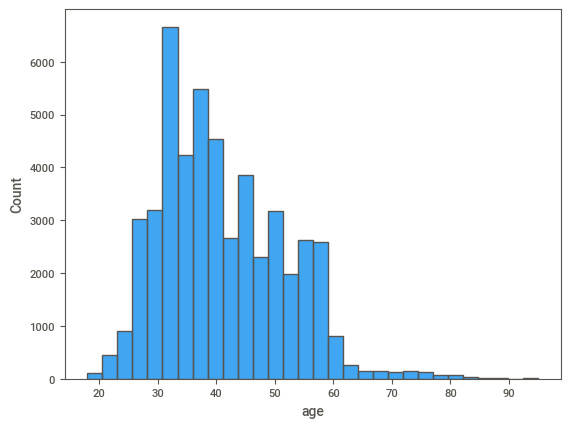

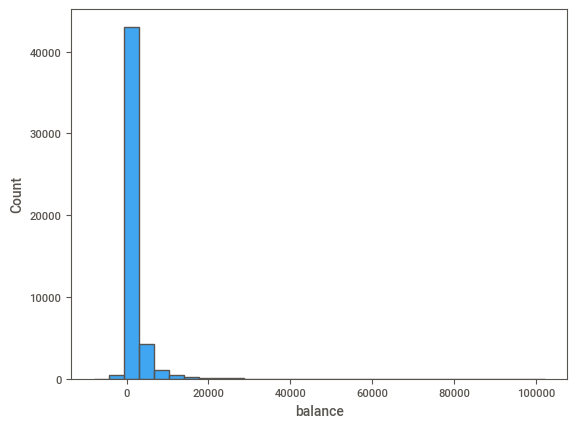

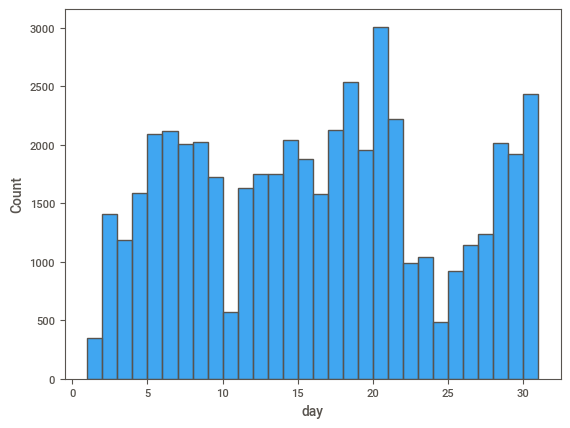

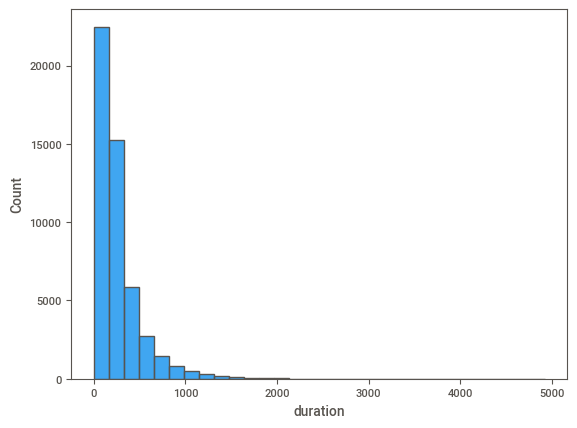

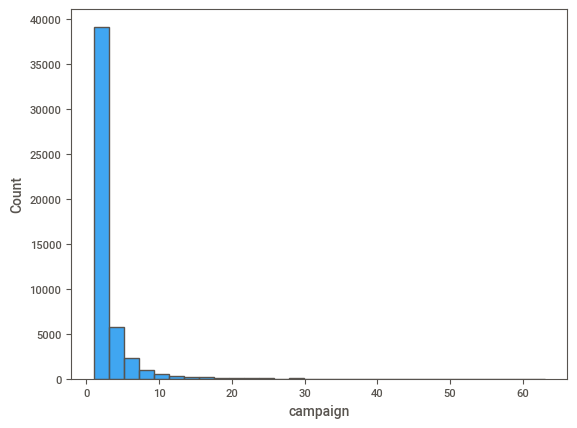

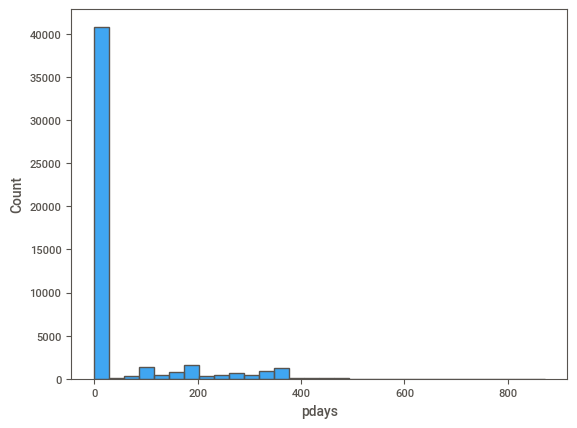

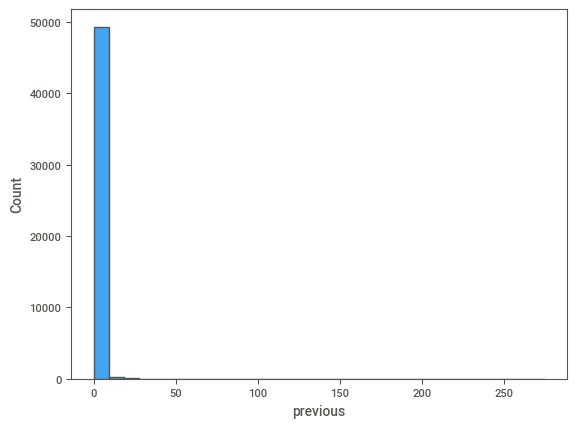

In [35]:
for n in num:
    sns.histplot(x=n,data=data,bins=30)
    plt.show()

Interpretacion de los histogramas:
- **Age** : Se asemeja a una distribución normal
- **Balance** : Hay que agrupar en intervalos
- **Day** : Podría ser interesante sustituir los valores numéricos por dia de la semana (Lunes, Martes...)
- **Duration, Campaign, pdays, previous**  : Se observa la presencia de outliers

## Diagramas de dispersion

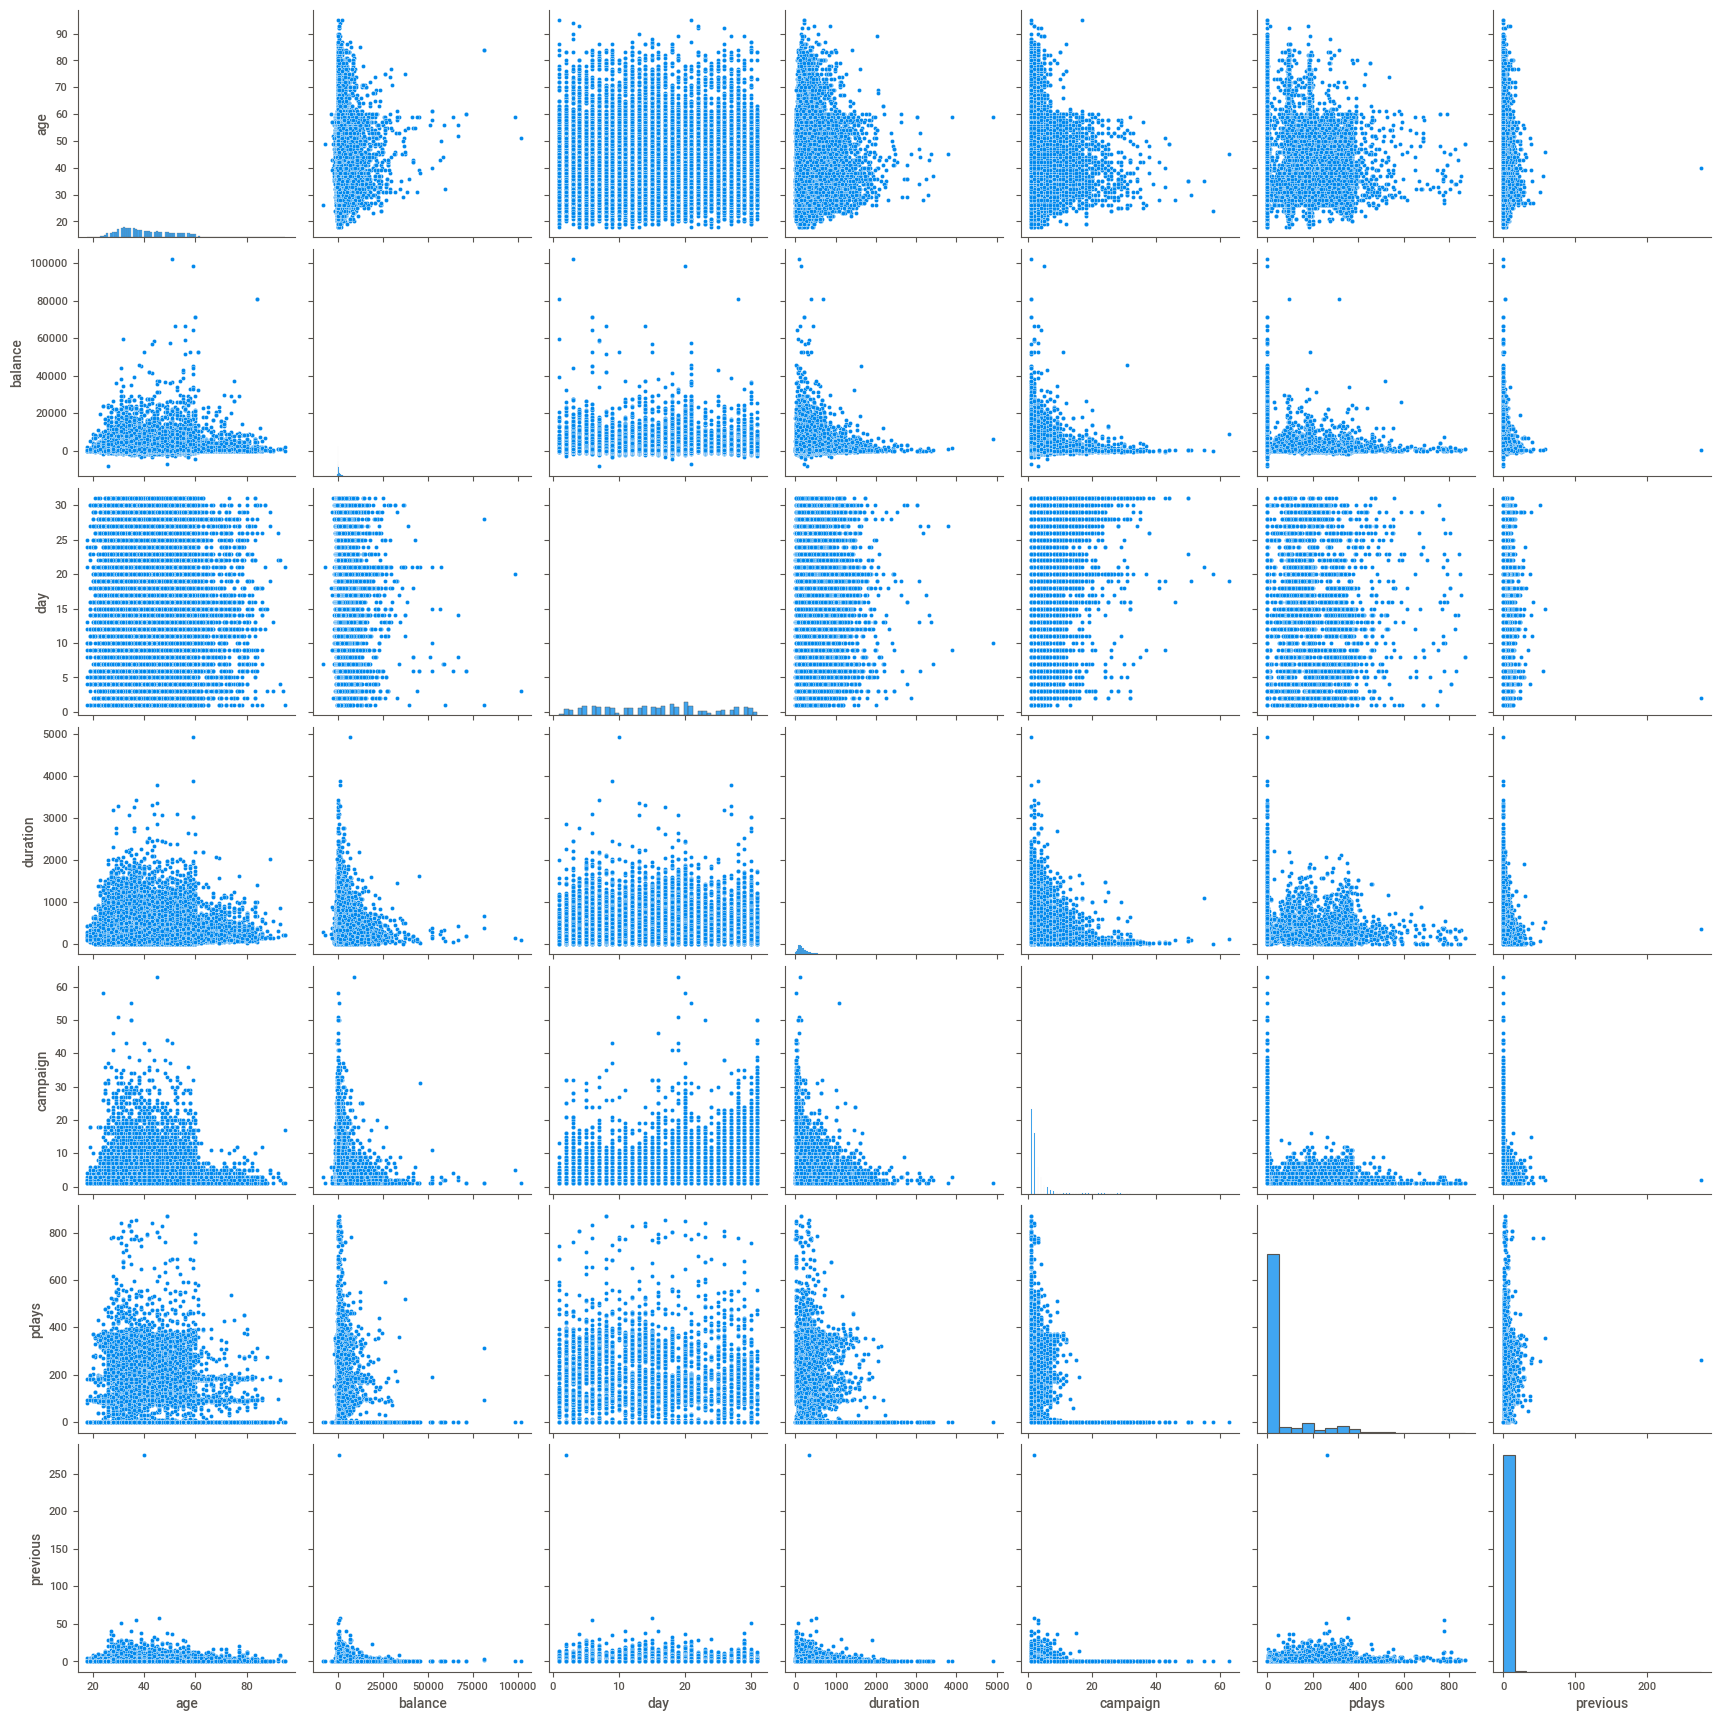

In [44]:
sns.pairplot(data[num])

## Valores nulos

In [42]:
print('Columnas con valores nulos: ')
data.isna().sum() /len(data)

Columnas con valores nulos: 


age           0.00000
job           0.00000
marital       0.00000
education     0.00000
default       0.00000
balance       0.00000
housing       0.00000
loan          0.00000
car           0.00179
contact       0.00000
day           0.00000
month         0.00000
duration      0.00000
campaign      0.00000
pdays         0.00000
previous      0.00000
poutcome      0.00000
subscribed    0.00000
dtype: float64

Observando que tenemos un 0,18% de nulos en la columna car y que además se trata de una variable categórica binaria, consideramos que eliminar dichos valores seria la opcion adecuada.